<h1>Introduction</h1>

In [38]:
from openpyxl import load_workbook
import math
import re
from numpy import *
from matplotlib import pyplot
from scipy.stats import *
import datetime
from scipy.interpolate import interp1d
import pandas as pd
import plotly.express as px
import numpy as np

In [35]:

letters = "a b c d e f g h i j k l m n o p q r s t u v w x y z".upper().split()
# print(letters)
alphas = []
for i in letters:
    alphas.append(i)
for i in letters:
    for j in letters:
        k = (i+j)
        alphas.append(k)
        if k == 'LF':
            break
    if i == 'L':
        break
alphas = alphas[4:]        
# print(alphas)        

<h2> Total cases worldwide </h2>

In [24]:
wb2 = load_workbook(r"D:\\time-series-covid19-confirmed-global.xlsx")  # Work Book
ws2 = wb2[wb2.sheetnames[0]]

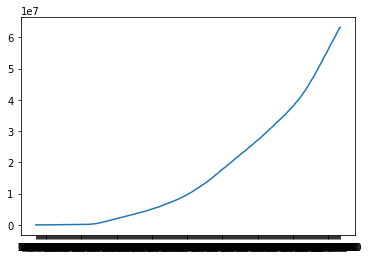

In [33]:
totalCasesInWorld = []
date = []
for X in alphas:
    column = ws2[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        date.append(column[0].value)
    else: 
        date.append(column[0].value.strftime('%d/%m/%Y'))
    totalCasesInWorld.append(Sum)
pyplot.plot(date,totalCasesInWorld)
pyplot.show()

<h2> Total Deaths World Wide </h2>

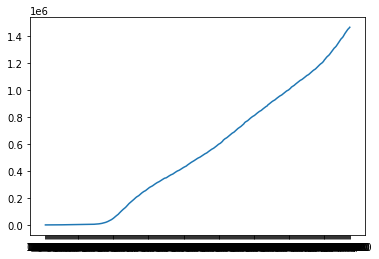

In [36]:
wb2 = load_workbook(r"D:\\time_series_covid19_deaths_global.xlsx")  # Work Book
ws2 = wb2[wb2.sheetnames[0]]
totalDeathsInWorld = []
date = []
for X in alphas:
    column = ws2[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        date.append(column[0].value)
    else: 
        date.append(column[0].value.strftime('%d/%m/%Y'))
    totalDeathsInWorld.append(Sum)
pyplot.plot(date,totalDeathsInWorld)
pyplot.show()

<h2> Heat Map for cases </h2>

In [41]:
df = pd.read_csv('COVID-19.csv')
# Interpolating circle to given circle range
list1 = df.cases.values.tolist()
m = interp1d([1, max(list1)], [5, 18])
circle_radius = m(list1)
typeLists = ['stamen-watercolor']
# 'open-street-map', 'carto-darkmatter', 'carto-positron', 'stamen-terrain', 
#              'stamen-toner', 
for i in typeLists:
    fig = px.density_mapbox(df, lat='Lat', lon='Long', radius=circle_radius, zoom=0, mapbox_style=i)
    fig.show()


<h2> Total cases and Deaths in India </h2>

In [61]:
wb = load_workbook("D:\owid-covid-data.xlsx")  # Work Book
ws = wb[wb.sheetnames[0]]
dataCol = "a b c d e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataS5 = {}
for X in dataCol:
    column = ws[X]
    columnDate = ws['D']
    sample = []
    for x in range(1,len(columnDate)):
          sample.append(column[x].value)
    dataS5[column[0].value] = sample    
# print(dataS5)    

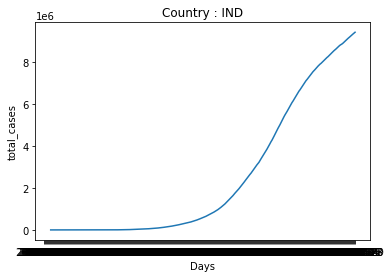

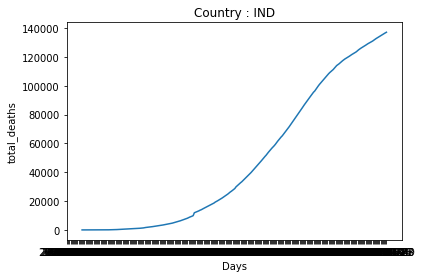

In [47]:
def dailyCasesPlotter(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()

countriesToLookFor = ['IND']
for C in countriesToLookFor:    
    dailyCasesPlotter(C,'total_cases')
    dailyCasesPlotter(C,'total_deaths')

<H1> Hypothesis </H1>

<h2> Cases Across Different Countries :</h2>

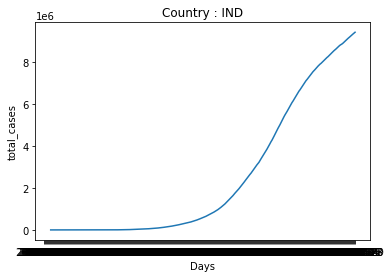

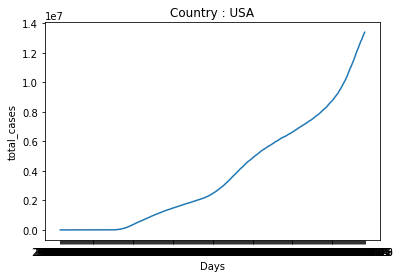

In [49]:
def dailyCasesPlotter(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()

countriesToLookFor = ['IND','USA']
for C in countriesToLookFor:    
    dailyCasesPlotter(C,'total_cases')


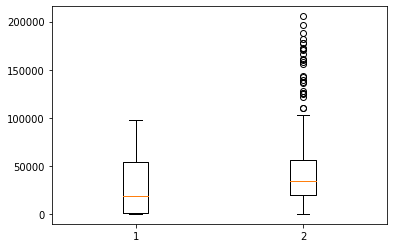

In [60]:
def dailyCasescomparison(code,key):
    iso_codes = dataS5['iso_code']
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            if total_cases[x]!= None:
                total_cases_IND.append(total_cases[x])
            else:
                total_cases_IND.append(0)
            date_IND.append(date[x])
#     print(total_cases_IND)        
    return total_cases_IND

data=[]
countriesToLookFor = ['IND','USA']
for C in countriesToLookFor:    
    data.append(dailyCasescomparison(C,'new_cases'))
    
pyplot.boxplot(data)
pyplot.show()


<h2> Age Groups </h2>

([<matplotlib.patches.Wedge at 0x26ae5f78f40>,
 [Text(1.099864295735893, 0.017278048656840017, 'Less than 14 years'),
  Text(1.0933570509441903, 0.12070774271198717, '15-29 years'),
  Text(0.9397051872092018, 0.5717990566030334, '30-44 years'),
  Text(-0.4652279531565006, 0.9967762796143441, '45-59 years'),
  Text(-0.36610163557183434, -1.0372895412716876, '60-74 years'),
  Text(1.042912059127538, -0.34976340135348516, 'More than 75 years')])

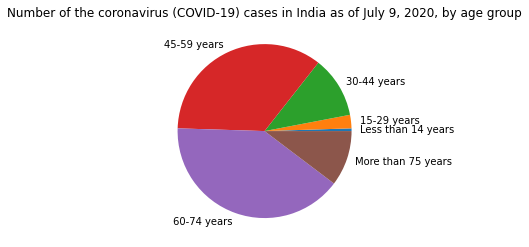

In [68]:
wbAge = load_workbook("D:\statistic_id1110522_number-of-covid-19-cases-india-2020-by-age-group.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(5,11):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
pyplot.title("Number of the coronavirus (COVID-19) cases in India as of July 9, 2020, by age group")
pyplot.pie(percentage, labels = ageGroup) 
    



<h2> Diseases : </h2>

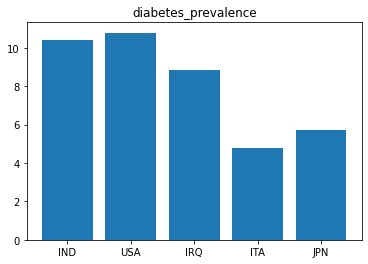

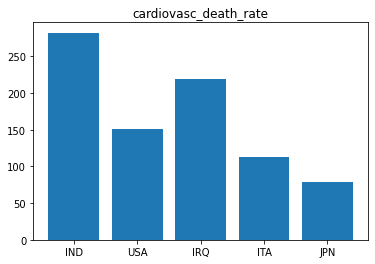

Text(0.5, 1.0, 'Total cases of covid')

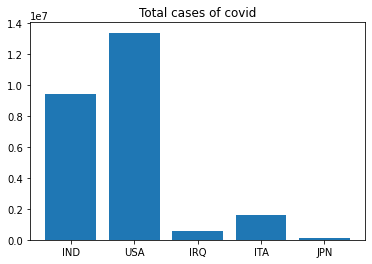

In [103]:
def diabetescases(code,key):
    iso_codes = dataS5['iso_code']
    diabetes_prevalence = dataS5[key]
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            return diabetes_prevalence[x]
            break
data=[]
countriesToLookFor = ['IND','USA','IRQ','ITA','JPN']
for C in countriesToLookFor:    
    data.append(diabetescases(C,'diabetes_prevalence'))
pyplot.bar(countriesToLookFor,data)
pyplot.title('diabetes_prevalence')
pyplot.show()


def cardiovasc_death_rateplotter(code,key):
    iso_codes = dataS5['iso_code']
    cardiovasc_death_rate = dataS5[key]
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            return cardiovasc_death_rate[x]
            break
dataY=[]
countriesToLookFor = ['IND','USA','IRQ','ITA','JPN']
for C in countriesToLookFor:    
    dataY.append(cardiovasc_death_rateplotter(C,'cardiovasc_death_rate'))
pyplot.bar(countriesToLookFor,dataY)
pyplot.title('cardiovasc_death_rate')
pyplot.show()


def dailyCasesPlotter(code,key):
    iso_codes = dataS5['iso_code']
    total_cases = dataS5[key]
    num = 0
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            if total_cases[x] != None:
                num += total_cases[x]
    return num        
countriesToLookFor = ['IND','USA','IRQ','ITA','JPN']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases'))
pyplot.bar(countriesToLookFor,totalCases)
pyplot.title("Total cases of covid")

<h2> Altitude </h2>

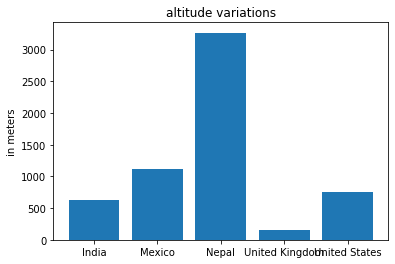

Text(0.5, 1.0, 'Total cases of covid')

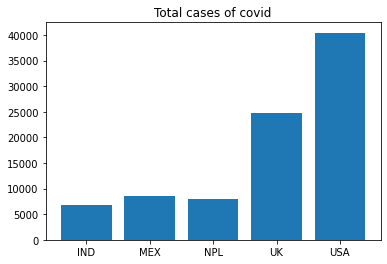

In [104]:
wb = load_workbook("D:\\DA data altitude.xlsx")  # Work Book
ws = wb[wb.sheetnames[0]]
column = ws['A']  # Column
columnalt = ws['D']
countriesToLookFor = ['India','Mexico','Nepal','United Kingdom','United States']
data=[]
countries=[]
for i in range(len(column)):
    countries.append(column[i].value)


for i in countriesToLookFor:
    x=columnalt[countries.index(i)].value
    s=''
    for i in x:
        if i.isdigit():
            s=s+i
        elif i==',':
            continue
        else:
            break
    data.append(int(s))

pyplot.bar(countriesToLookFor,data)
pyplot.title('altitude variations')
pyplot.ylabel('in meters')
pyplot.show()


countriesToLookFor = ['IND','MEX','NPL','UKR','USA']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases_per_million'))
countriesToLookFor[3] = 'UK'
totalCases[3] = 1640000*1000000/66000000
pyplot.bar(countriesToLookFor,totalCases)
pyplot.title("Total cases of covid")

<h2> Economy </h2>

<h2> After Lockdown Effects </h2>

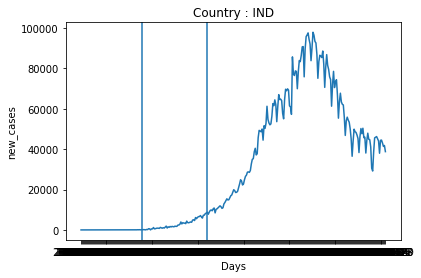

In [94]:

def dailyCasesPlotter(code,key,startDate,endDate):
    iso_codes = dataS5['iso_code']
#     print(iso_codes)
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    pyplot.plot(date_IND,total_cases_IND)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.axvline(x=startDate)
    pyplot.axvline(x=endDate)
    pyplot.ylabel(key)
    pyplot.show()

dailyCasesPlotter('IND','new_cases','2020-03-25','2020-05-31')

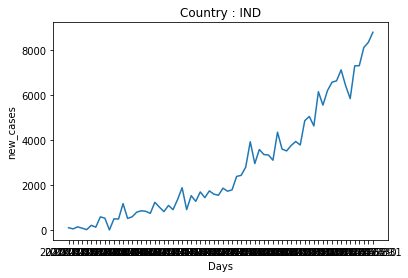

In [113]:

def dailyCasesLPlotter(code,key,startDate,endDate):
    iso_codes = dataS5['iso_code']
#     print(iso_codes)
    date = dataS5['date']
    total_cases = dataS5[key]
    total_cases_IND = []
    date_IND = []
    for x in range(len(iso_codes)):
        if iso_codes[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    startKey = date.index(startDate)
    endKey = date.index(endDate)
    final_cases = []
    final_date = []
    for x in range(startKey,endKey+1):
        final_cases.append(total_cases_IND[x])
        final_date.append(date_IND[x])
    pyplot.plot(final_date,final_cases)
    pyplot.title("Country : " + code)
    pyplot.xlabel("Days")
    pyplot.ylabel(key)
    pyplot.show()
    
dailyCasesLPlotter('IND','new_cases','2020-03-25','2020-05-31')    

([<matplotlib.patches.Wedge at 0x26b03cd7640>,
 [Text(-0.46835717599151955, 0.995309778760989, 'Bought at a higher price than mandated by the government at a retail store/chemist'),
  Text(0.13786642613375089, -1.0913261879681562, 'Bought at government mandated price at a retail store/chemist'),
  Text(1.0461621185951564, -0.33991884563303376, 'Bought at a higher price than mandated by the government online')])

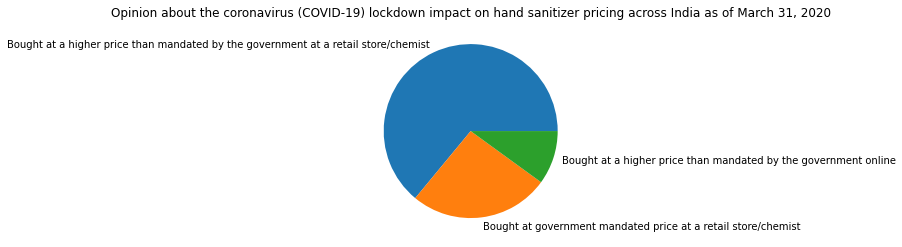

In [96]:
wbAge = load_workbook("D:\statistic_id1108922_opinion-on-impact-of-covid-19-lockdown-on-hand-sanitizer-prices-india-2020.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(5,8):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
pyplot.title("Opinion about the coronavirus (COVID-19) lockdown impact on hand sanitizer pricing across India as of March 31, 2020")
pyplot.pie(percentage, labels = ageGroup) 
    



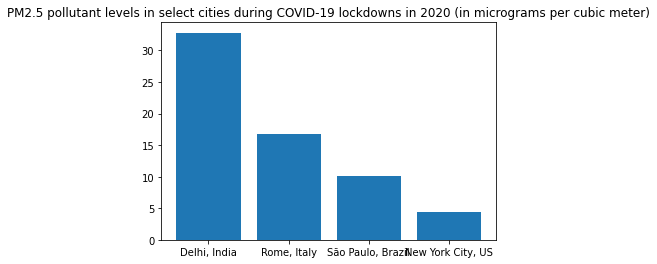

Text(0.5, 1.0, 'Total cases of covid')

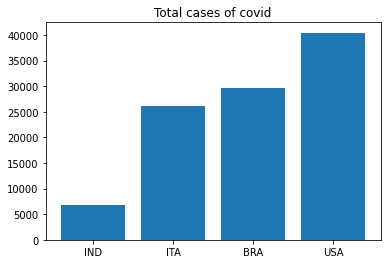

In [112]:
wbAge = load_workbook("D:\statistic_id1119805_pm25-pollutant-levels-in-select-worldwide-cities-during-covid-19-lockdown-2020.xlsx")  # Work Book
wsAge = wbAge[wbAge.sheetnames[1]]

ageGroup = []
percentage = []

colAge = wsAge['B']
colPer = wsAge['C']

for x in range(6,10):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
#     percentage.append(0)
pyplot.title("PM2.5 pollutant levels in select cities during COVID-19 lockdowns in 2020 (in micrograms per cubic meter)")
pyplot.bar(ageGroup,percentage)
pyplot.show()
countriesToLookFor = ['IND','ITA','BRA','USA']
totalCases = []
for C in countriesToLookFor:    
    totalCases.append(dailyCasesPlotter(C,'new_cases_per_million'))

pyplot.bar(countriesToLookFor,totalCases)
pyplot.title("Total cases of covid")    



In [101]:
columnHeadings = dataS5.keys()
print(columnHeadings)

dict_keys(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths_per_million', 'new_deaths_per_million', 'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients', 'icu_patients_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers', 'male_smokers', 'handwashing_faci